In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [71]:
raw_data = pd.read_csv('all_data_raw.csv',index_col=0)
raw_data

,简称,日期,开盘价(元),收盘价(元),subsector
代码,,,,,
600030.SH,中信证券,2010-01-04,16.50,16.13,资本市场服务
600030.SH,中信证券,2010-01-05,16.26,16.92,资本市场服务
600030.SH,中信证券,2010-01-06,17.01,16.72,资本市场服务
600030.SH,中信证券,2010-01-07,16.71,16.32,资本市场服务
600030.SH,中信证券,2010-01-08,16.21,16.63,资本市场服务
...,...,...,...,...,...
000563.SZ,陕国投A,2021-01-13,3.59,3.51,其他金融业
000563.SZ,陕国投A,2021-01-14,3.49,3.51,其他金融业
000563.SZ,陕国投A,2021-01-15,3.51,3.52,其他金融业


In [72]:
raw_data['month'] = raw_data.apply(lambda x:x['日期'][:-3],axis=1)
raw_data['year'] = raw_data.apply(lambda x:x['日期'][:-6],axis=1)

In [73]:
raw_data['return'] = np.log(raw_data['收盘价(元)'])-np.log(raw_data['开盘价(元)'])

In [74]:
raw_data

,简称,日期,开盘价(元),收盘价(元),subsector,month,year,return
代码,,,,,,,,
600030.SH,中信证券,2010-01-04,16.50,16.13,资本市场服务,2010-01,2010,-0.022679
600030.SH,中信证券,2010-01-05,16.26,16.92,资本市场服务,2010-01,2010,0.039788
600030.SH,中信证券,2010-01-06,17.01,16.72,资本市场服务,2010-01,2010,-0.017196
600030.SH,中信证券,2010-01-07,16.71,16.32,资本市场服务,2010-01,2010,-0.023616
600030.SH,中信证券,2010-01-08,16.21,16.63,资本市场服务,2010-01,2010,0.025580
...,...,...,...,...,...,...,...,...
000563.SZ,陕国投A,2021-01-13,3.59,3.51,其他金融业,2021-01,2021,-0.022536
000563.SZ,陕国投A,2021-01-14,3.49,3.51,其他金融业,2021-01,2021,0.005714
000563.SZ,陕国投A,2021-01-15,3.51,3.52,其他金融业,2021-01,2021,0.002845


In [75]:
mutiIndex = list(zip(raw_data['month'],raw_data['简称']))
index = pd.MultiIndex.from_tuples(mutiIndex,names=['month','简称'])
raw_data.set_index(index)

简称          日期  开盘价(元)  收盘价(元) subsector    month  year  \
month   简称                                                                
2010-01 中信证券  中信证券  2010-01-04   16.50   16.13    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-05   16.26   16.92    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-06   17.01   16.72    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-07   16.71   16.32    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-08   16.21   16.63    资本市场服务  2010-01  2010   
...            ...         ...     ...     ...       ...      ...   ...   
2021-01 陕国投A  陕国投A  2021-01-13    3.59    3.51     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-14    3.49    3.51     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-15    3.51    3.52     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-18    3.50    3.54     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-19    3.53    3.60     其他金融业  2021-01  2021   

                return  
month   简称              
2010-01 中信证券 -0.022679  
        中信证券  0.039788  
        中信证券 -0.017196  
        中信证券 -0.023616  
        中信证券  0.025580  
...                ...  
2021-01 陕国投A -0.022536  
        陕国投A  0.005714  
        陕国投A  0.002845  
        陕国投A  0.011364  
        陕国投A  0.019636  

[230203 rows x 8 columns]

In [76]:
one_month = raw_data[raw_data['month']=='2020-12']
one_month[one_month['简称']=='中信证券']

,简称,日期,开盘价(元),收盘价(元),subsector,month,year,return
代码,,,,,,,,
600030.SH,中信证券,2020-12-01,30.21,31.30,资本市场服务,2020-12,2020,0.035445
600030.SH,中信证券,2020-12-02,31.30,31.08,资本市场服务,2020-12,2020,-0.007054
600030.SH,中信证券,2020-12-03,31.03,30.90,资本市场服务,2020-12,2020,-0.004198
600030.SH,中信证券,2020-12-04,30.95,30.30,资本市场服务,2020-12,2020,-0.021225
600030.SH,中信证券,2020-12-07,30.31,30.01,资本市场服务,2020-12,2020,-0.009947
600030.SH,中信证券,2020-12-08,29.99,30.01,资本市场服务,2020-12,2020,0.000667
600030.SH,中信证券,2020-12-09,30.10,29.29,资本市场服务,2020-12,2020,-0.027279
600030.SH,中信证券,2020-12-10,29.20,29.16,资本市场服务,2020-12,2020,-0.001371
600030.SH,中信证券,2020-12-11,29.13,28.75,资本市场服务,2020-12,2020,-0.013131


In [77]:
pivot_m = pd.pivot_table(data=one_month,values='return',columns='简称',index='日期')
pivot_m

简称,*ST安信,*ST熊猫,上海银行,东兴证券,东北证券,东吴证券,东方能源,东方证券,东方财富,中信建投,...,邮储银行,郑州银行,锦龙股份,长城证券,长江证券,长沙银行,陕国投A,青农商行,青岛银行,鲁信创投
日期,,,,,,,,,,,,,,,,,,,,,
2020-12-01,0.006826,0.012786,0.023357,0.033136,0.025821,0.031375,0.006749,0.025533,0.071132,0.031597,...,0.028932,0.071642,0.078537,0.024225,0.021361,0.043158,0.054630,0.083140,0.075013,0.020143
2020-12-02,0.006780,-0.016439,-0.004884,0.002970,0.003918,0.003865,0.002235,0.002518,-0.021736,-0.005610,...,-0.023257,0.004988,0.028894,0.047576,-0.011173,-0.012981,-0.002561,-0.003766,0.000000,-0.002937
2020-12-03,0.026492,-0.005540,0.007317,0.004454,0.013632,0.010552,0.024204,0.006700,0.023914,0.008317,...,0.000000,0.112424,0.006427,0.005060,-0.009029,0.051896,0.022815,0.020736,0.000000,-0.002951
2020-12-04,-0.006557,0.007367,-0.008563,-0.011249,-0.009775,-0.010633,-0.004348,-0.013502,-0.015048,-0.007241,...,-0.011929,0.007203,0.041473,-0.005835,-0.011442,-0.022407,-0.015267,-0.024977,-0.081649,-0.008974
2020-12-07,-0.019934,-0.007394,-0.012361,-0.022063,-0.018859,-0.016708,-0.002195,-0.018772,-0.033313,-0.013263,...,-0.016162,-0.026996,-0.029301,-0.013363,-0.023284,-0.022852,-0.023408,-0.013793,0.040274,-0.018897
2020-12-08,-0.013514,0.014706,0.003724,0.001537,0.002000,-0.000991,-0.015504,0.001723,0.005004,-0.013002,...,-0.006167,-0.015229,0.000000,0.013324,-0.004717,-0.010101,0.000000,0.027453,-0.067265,0.008017
2020-12-09,-0.013699,-0.012762,-0.009913,-0.042426,-0.041694,-0.045485,0.004474,-0.044060,-0.049325,-0.029431,...,0.008247,0.002554,-0.033028,-0.040485,-0.033496,-0.022588,-0.018642,0.073135,-0.016475,-0.050842
2020-12-10,0.000000,0.000000,-0.003752,0.001614,0.000000,-0.001035,-0.006749,-0.007227,0.000749,0.029980,...,-0.002060,-0.002587,0.040957,0.003067,0.006094,-0.009380,0.000000,-0.011385,0.020340,0.005128
2020-12-11,-0.035091,-0.039590,-0.006309,-0.013805,-0.019886,-0.028378,-0.027588,-0.000908,-0.015742,0.011331,...,0.018462,-0.007823,-0.013739,-0.015492,-0.013456,-0.011647,-0.010811,0.026417,-0.008554,-0.019418


In [78]:
corr=pivot_m.corr()
corr

简称,*ST安信,*ST熊猫,上海银行,东兴证券,东北证券,东吴证券,东方能源,东方证券,东方财富,中信建投,...,邮储银行,郑州银行,锦龙股份,长城证券,长江证券,长沙银行,陕国投A,青农商行,青岛银行,鲁信创投
简称,,,,,,,,,,,,,,,,,,,,,
*ST安信,1.000000,0.345671,0.339946,0.150697,0.123181,0.105365,0.226515,0.138537,0.277092,0.270307,...,0.185807,0.285756,0.472667,0.136963,0.096197,0.383003,0.224611,0.215644,0.288916,-0.053890
*ST熊猫,0.345671,1.000000,0.229113,0.367515,0.291282,0.278032,0.472873,0.377190,0.338578,0.195997,...,0.026379,0.163733,0.422075,0.179823,0.265148,0.238158,0.276783,0.089915,0.092038,0.257966
上海银行,0.339946,0.229113,1.000000,0.726634,0.767187,0.685715,0.206658,0.715145,0.855256,0.669259,...,0.599813,0.654790,0.615583,0.587271,0.687186,0.807082,0.897099,0.516659,0.535764,0.639195
东兴证券,0.150697,0.367515,0.726634,1.000000,0.906117,0.882292,0.371921,0.936998,0.866419,0.693148,...,0.337637,0.467099,0.700099,0.754166,0.901859,0.627177,0.817948,0.053772,0.477727,0.803252
东北证券,0.123181,0.291282,0.767187,0.906117,1.000000,0.941383,0.244573,0.913823,0.892957,0.729670,...,0.305537,0.577375,0.646007,0.850253,0.906874,0.686478,0.847962,0.103056,0.468029,0.854387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
长沙银行,0.383003,0.238158,0.807082,0.627177,0.686478,0.652284,0.238818,0.670646,0.786153,0.550876,...,0.488087,0.806812,0.444483,0.453975,0.565867,1.000000,0.827486,0.371013,0.542422,0.480495
陕国投A,0.224611,0.276783,0.897099,0.817948,0.847962,0.785037,0.205737,0.806223,0.873138,0.731500,...,0.533453,0.676118,0.692631,0.701750,0.776698,0.827486,1.000000,0.451723,0.558700,0.745362
青农商行,0.215644,0.089915,0.516659,0.053772,0.103056,0.028143,0.028820,0.130203,0.269554,0.226983,...,0.625245,0.269217,0.066756,0.045255,0.109402,0.371013,0.451723,1.000000,0.340578,0.112086


In [79]:
print(sum(np.sum(corr.isna())))

0


In [80]:
distance_m = np.sqrt(2*(1-corr))
distance_m

简称,*ST安信,*ST熊猫,上海银行,东兴证券,东北证券,东吴证券,东方能源,东方证券,东方财富,中信建投,...,邮储银行,郑州银行,锦龙股份,长城证券,长江证券,长沙银行,陕国投A,青农商行,青岛银行,鲁信创投
简称,,,,,,,,,,,,,,,,,,,,,
*ST安信,0.000000,1.143966,1.148959,1.303306,1.324250,1.337636,1.243773,1.312603,1.202421,1.208051,...,1.276082,1.195194,1.026969,1.313801,1.344472,1.110853,1.245303,1.252482,1.192547,1.451819
*ST熊猫,1.143966,0.000000,1.241682,1.124709,1.190561,1.201639,1.026769,1.116073,1.150150,1.268072,...,1.395436,1.293265,1.075105,1.280763,1.212314,1.234376,1.202678,1.349137,1.347562,1.218223
上海银行,1.148959,1.241682,0.000000,0.739413,0.682368,0.792824,1.259637,0.754792,0.538041,0.813316,...,0.894636,0.830915,0.876832,0.908548,0.790966,0.621156,0.453654,0.983200,0.963573,0.849476
东兴证券,1.303306,1.124709,0.739413,0.000000,0.433319,0.485197,1.120784,0.354970,0.516877,0.783393,...,1.150968,1.032377,0.774468,0.701191,0.443037,0.863508,0.603411,1.375666,1.022031,0.627292
东北证券,1.324250,1.190561,0.682368,0.433319,0.000000,0.342395,1.229168,0.415155,0.462695,0.735296,...,1.178527,0.919374,0.841419,0.547261,0.431570,0.791862,0.551431,1.339361,1.031476,0.539653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
长沙银行,1.110853,1.234376,0.621156,0.863508,0.791862,0.833925,1.233841,0.811608,0.653984,0.947760,...,1.011843,0.621592,1.054056,1.045012,0.931808,0.000000,0.587391,1.121594,0.956638,1.019318
陕国投A,1.245303,1.202678,0.453654,0.603411,0.551431,0.655687,1.260368,0.622538,0.503710,0.732803,...,0.965968,0.804838,0.784053,0.772334,0.668284,0.587391,0.000000,1.047164,0.939468,0.713636
青农商行,1.252482,1.349137,0.983200,1.375666,1.339361,1.394172,1.393686,1.318937,1.208674,1.243396,...,0.865743,1.208952,1.366195,1.381843,1.334615,1.121594,1.047164,0.000000,1.148409,1.332602


In [81]:
import networkx as nx

In [82]:
zipped = []
for i in range(len(distance_m.columns)):
    zipped.append(list(zip([distance_m.columns[i]]*distance_m.shape[0],distance_m.index,distance_m[distance_m.columns[i]])))
List_flat = []
for i in zipped:
    for j in i:
        List_flat.append(j)
s_List_flat = list(set(List_flat))
G = nx.Graph()
for i in range(len(distance_m.columns)):
    G.add_node(distance_m.columns[i])
G.add_weighted_edges_from(s_List_flat)

In [83]:
mst = nx.minimum_spanning_tree(G=G)

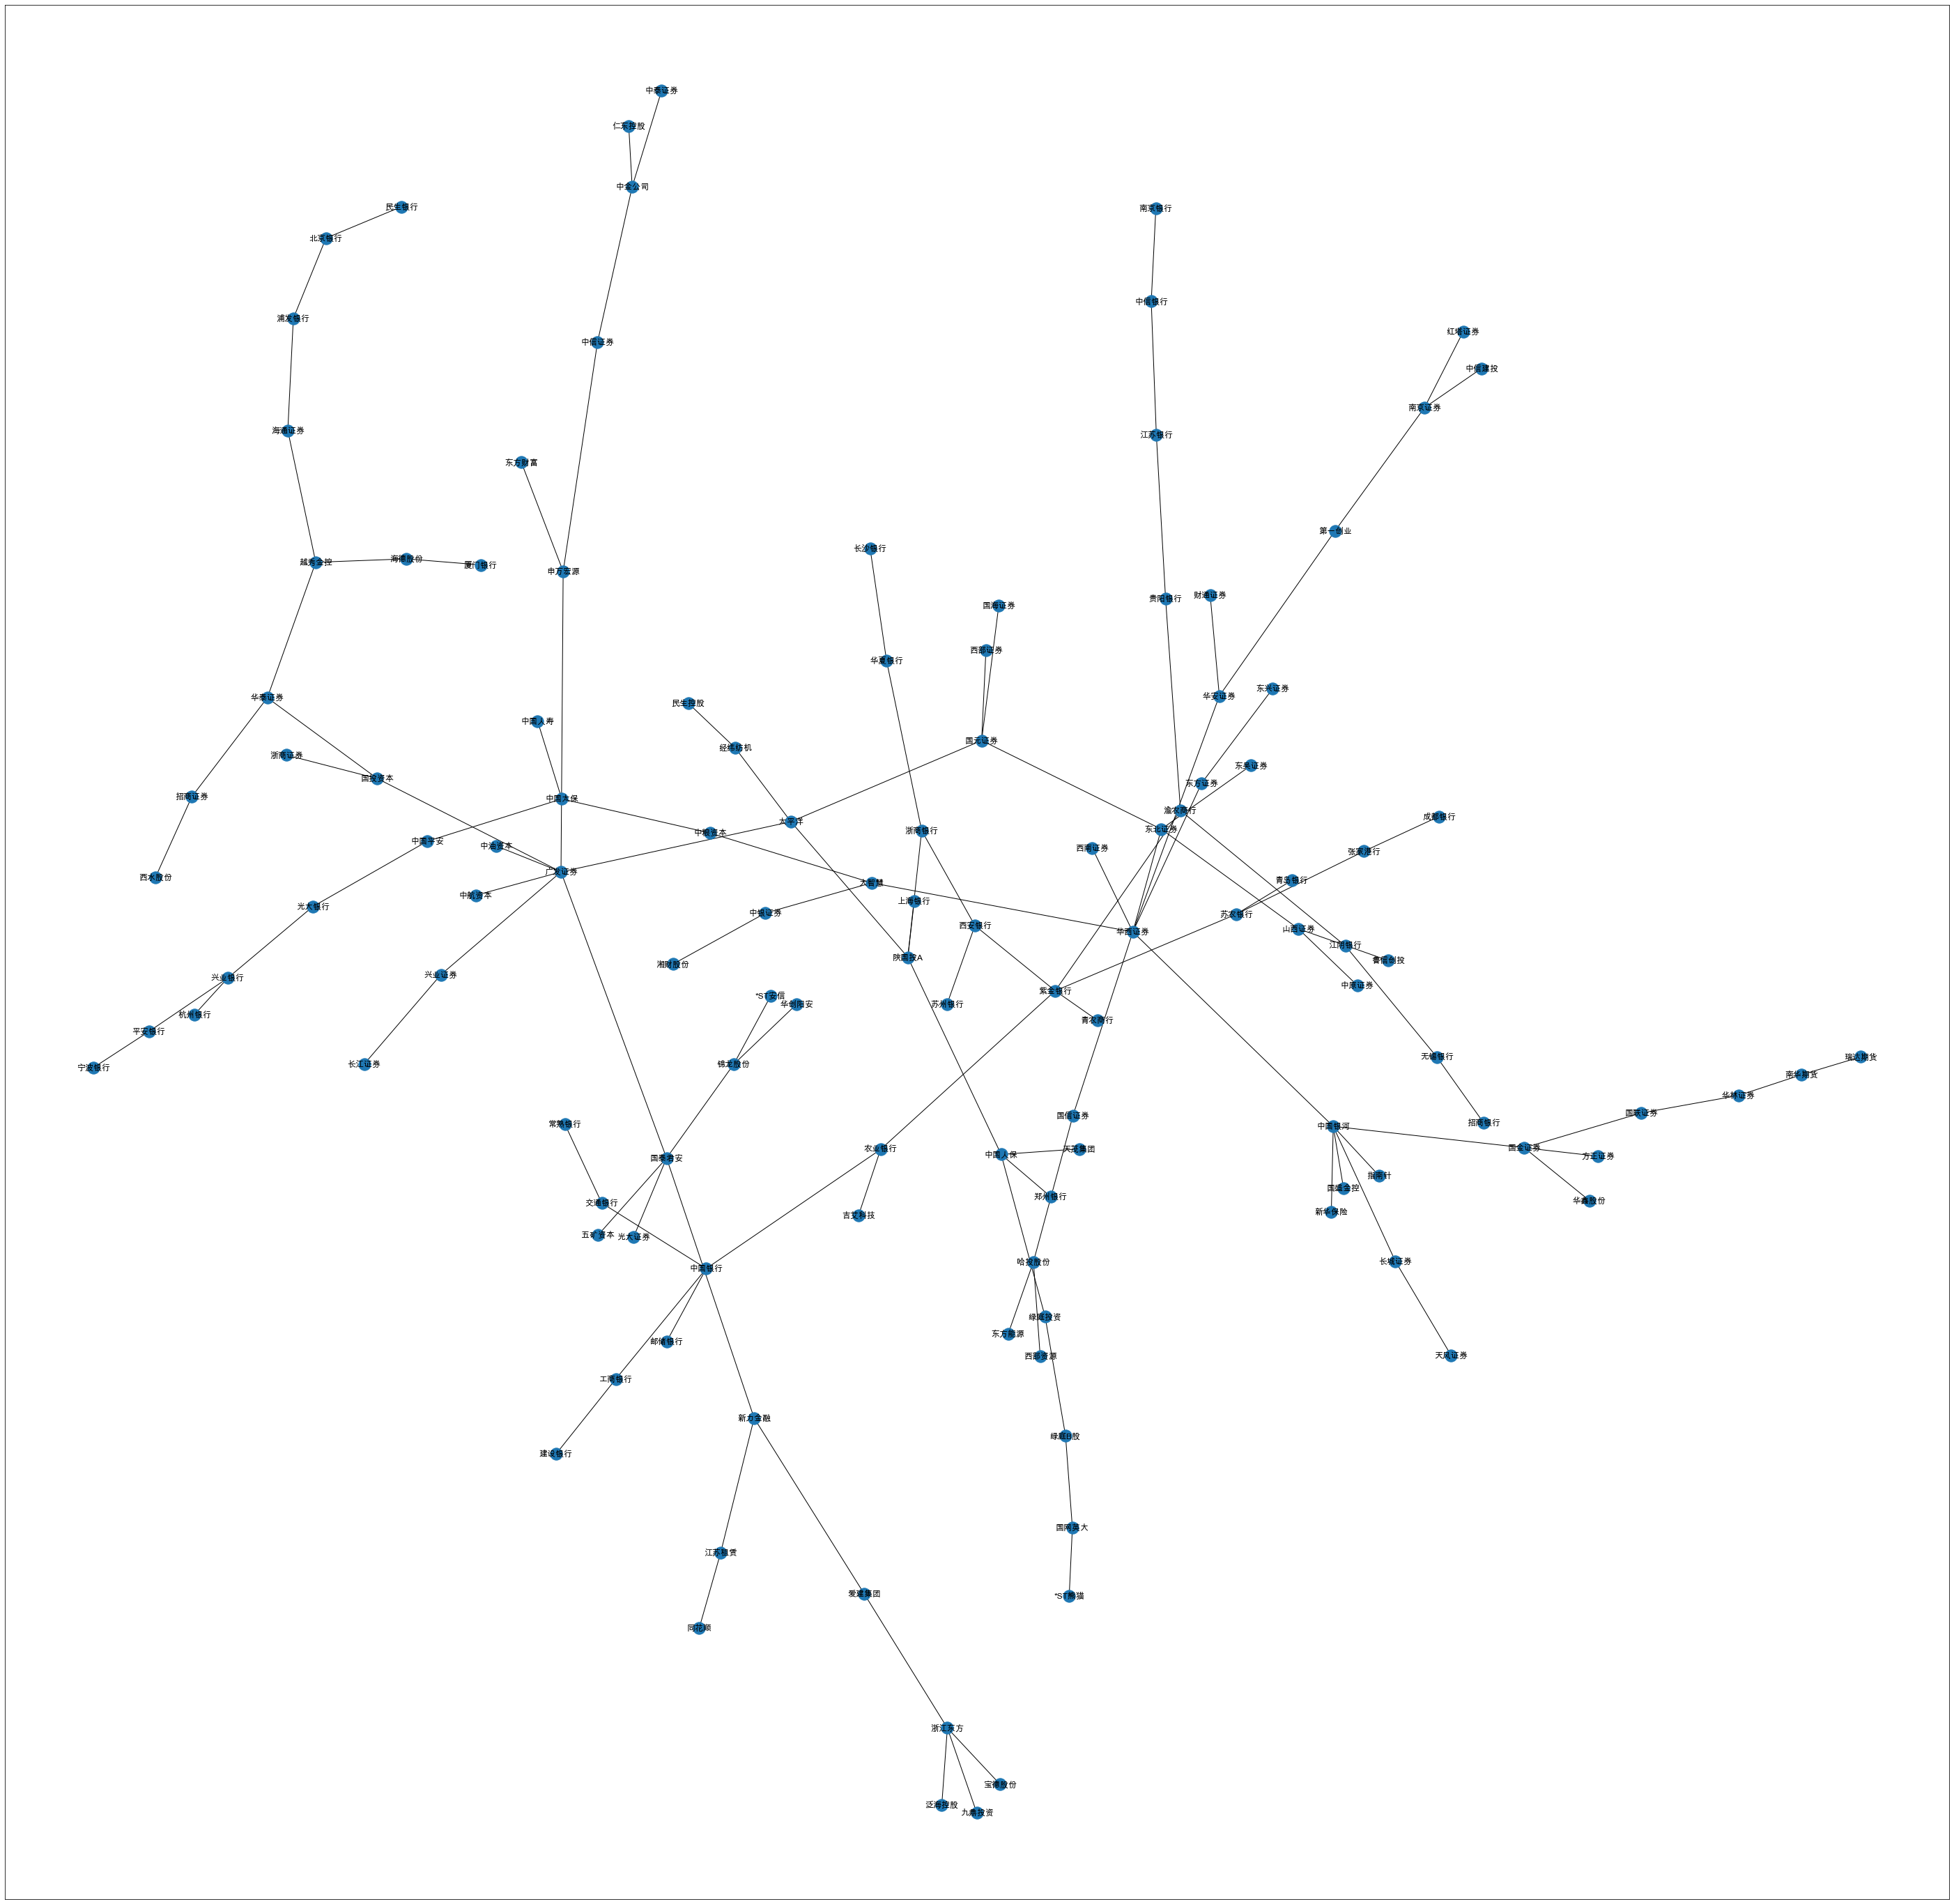

In [84]:
plt.figure(figsize=(50,50))

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_networkx(mst,with_labels=True,)

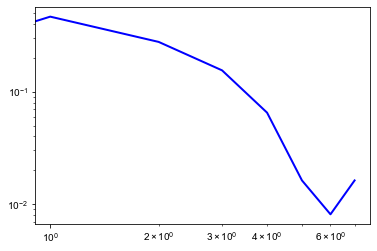

In [92]:
degree =  nx.degree_histogram(mst)          
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree] 
plt.loglog(x,y,color="blue",linewidth=2)          
plt.show()                                                          